#setup

In [2]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.2 MB/s eta 0:00:00


In [3]:
import openai
openai.api_key = "sk-"

In [4]:
# list models
models = openai.Model.list()

In [11]:
# print the first model's id
print(models.data)

[<Model model id=whisper-1 at 0x7fb71ff9f970> JSON: {
  "id": "whisper-1",
  "object": "model",
  "created": 1677532384,
  "owned_by": "openai-internal",
  "permission": [
    {
      "id": "modelperm-KlsZlfft3Gma8pI6A8rTnyjs",
      "object": "model_permission",
      "created": 1683912666,
      "allow_create_engine": false,
      "allow_sampling": true,
      "allow_logprobs": true,
      "allow_search_indices": false,
      "allow_view": true,
      "allow_fine_tuning": false,
      "organization": "*",
      "group": null,
      "is_blocking": false
    }
  ],
  "root": "whisper-1",
  "parent": null
}, <Model model id=babbage at 0x7fb71ff9f9c0> JSON: {
  "id": "babbage",
  "object": "model",
  "created": 1649358449,
  "owned_by": "openai",
  "permission": [
    {
      "id": "modelperm-49FUp5v084tBB49tC4z8LPH5",
      "object": "model_permission",
      "created": 1669085501,
      "allow_create_engine": false,
      "allow_sampling": true,
      "allow_logprobs": true,
      "all

In [39]:
import pandas as pd
worksheet = pd.read_excel("/content/test.xlsx")

In [40]:
worksheet.head()

,"‘Absolute equality may itself be a cause of inequality.’ In the light of this statement, discuss substantive equality."
0,"""To preserve basic freedoms and dignity of ind..."
1,Explain the legal position in case of repugnan...
2,What are the tests laid down by the Supreme Co...
3,Elucidate Wednesbury’s Principles of Unreasona...
4,“Amending power does not extend to damaging or...


In [41]:
worksheet.columns = ["Question"]

In [42]:
worksheet.head()

,Question
0,"""To preserve basic freedoms and dignity of ind..."
1,Explain the legal position in case of repugnan...
2,What are the tests laid down by the Supreme Co...
3,Elucidate Wednesbury’s Principles of Unreasona...
4,“Amending power does not extend to damaging or...


In [43]:
for q in worksheet['Question']:
    print(q, end = "\n \n")

"To preserve basic freedoms and dignity of individuals, a Constitution should be permeated with Constitutionalism.’ Discuss.
 
Explain the legal position in case of repugnancy between Union and State laws with the help of decided case laws. Which law shall prevail in case of repugnancy?
 
What are the tests laid down by the Supreme Court in a recent decision for quantifying and providing quota for Other Backward Classes in local body elections?
 
Elucidate Wednesbury’s Principles of Unreasonableness’. Do these principles provide in any way, scope for ‘merits review’ of administrative decisions?
 
“Amending power does not extend to damaging or destroying the basic structure or framework of our Constitution.” Discuss.
 


#Trial:1

prompt = "Answer the question:"

In [44]:
#trial:1
# Define the prompt
prompt = "Answer the question:"

# Generate answers for each question
answers = []
for question in worksheet['Question']:
    response = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt + "\n" + question,
        temperature=0.7,
        max_tokens=150,
        top_p=0.1,
        frequency_penalty=1.176,
        presence_penalty=0,
        request_timeout=5
    )
    answer = response['choices'][0]['text'].strip()
    answers.append(answer)

# Add the answers to the DataFrame as a new column
worksheet['Answer'] = answers

In [45]:
worksheet.head()

,Question,Answer
0,"""To preserve basic freedoms and dignity of ind...",Constitutionalism is the idea that a governmen...
1,Explain the legal position in case of repugnan...,In case of repugnancy between Union and State ...
2,What are the tests laid down by the Supreme Co...,The Supreme Court laid down the following test...
3,Elucidate Wednesbury’s Principles of Unreasona...,Wednesbury's Principles of Unreasonableness ar...
4,“Amending power does not extend to damaging or...,The basic structure or framework of the Consti...


#Trial:2
With context and better prompt.

prompt = "As a top Indian Lawyer who has all the knowledge about Indian Constitutional and Administrative Law, and International Law, Answer the Indian UPPSC LAW Optional EXAM question:"

In [46]:
#trial:2
# Define the prompt
prompt = "As a top Indian Lawyer who has all the knowledge about Indian Constitutional and Administrative Law, and International Law, Answer the Indian UPPSC LAW Optional EXAM question:"

# Generate answers for each question
answers = []
for question in worksheet['Question']:
    response = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt + "\n" + question,
        temperature=0.7,
        max_tokens=150,
        top_p=0.1,
        frequency_penalty=1.176,
        presence_penalty=0,
        request_timeout=10
    )
    answer = response['choices'][0]['text'].strip()
    answers.append(answer)

# Add the answers to the DataFrame as a new column
worksheet['Answer_2'] = answers

In [47]:
worksheet.head()

,Question,Answer,Answer_2
0,"""To preserve basic freedoms and dignity of ind...",Constitutionalism is the idea that a governmen...,Constitutionalism is a concept that emphasizes...
1,Explain the legal position in case of repugnan...,In case of repugnancy between Union and State ...,The legal position in case of repugnancy betwe...
2,What are the tests laid down by the Supreme Co...,The Supreme Court laid down the following test...,The Supreme Court in its recent decision has l...
3,Elucidate Wednesbury’s Principles of Unreasona...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury's Principles of Unreasonableness ar...
4,“Amending power does not extend to damaging or...,The basic structure or framework of the Consti...,The Constitution of India is the supreme law o...


#Trial:3
Longer max_tokens=250 so to generate longer answers.

In [48]:
#trial:3
# Define the prompt
prompt = "As a top Indian Lawyer who has all the knowledge about Indian Constitutional and Administrative Law, and International Law, Answer the Indian UPPSC LAW Optional EXAM question:"

# Generate answers for each question
answers = []
for question in worksheet['Question']:
    response = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt + "\n" + question,
        temperature=0.7,
        max_tokens=250,
        top_p=0.1,
        frequency_penalty=1.176,
        presence_penalty=0,
        request_timeout=60
    )
    answer = response['choices'][0]['text'].strip()
    answers.append(answer)

# Add the answers to the DataFrame as a new column
worksheet['Answer_3'] = answers

In [49]:
worksheet.head()

,Question,Answer,Answer_2,Answer_3
0,"""To preserve basic freedoms and dignity of ind...",Constitutionalism is the idea that a governmen...,Constitutionalism is a concept that emphasizes...,Constitutionalism is a concept that emphasizes...
1,Explain the legal position in case of repugnan...,In case of repugnancy between Union and State ...,The legal position in case of repugnancy betwe...,The legal position in case of repugnancy betwe...
2,What are the tests laid down by the Supreme Co...,The Supreme Court laid down the following test...,The Supreme Court in its recent decision has l...,The Supreme Court in its recent decision has l...
3,Elucidate Wednesbury’s Principles of Unreasona...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury's Principles of Unreasonableness ar...
4,“Amending power does not extend to damaging or...,The basic structure or framework of the Consti...,The Constitution of India is the supreme law o...,The Constitution of India is the supreme law o...


#Trial:4
Even more Longer max_tokens=400 so to generate longer answers.

In [50]:
#trial:4
# Define the prompt
prompt = "As a top Indian Lawyer who has all the knowledge about Indian Constitutional and Administrative Law, and International Law, Answer the Indian UPPSC LAW Optional EXAM question:"

# Generate answers for each question
answers = []
for question in worksheet['Question']:
    response = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt + "\n" + question,
        temperature=0.7,
        max_tokens=400,
        top_p=0.1,
        frequency_penalty=1.176,
        presence_penalty=0,
        request_timeout=60
    )
    answer = response['choices'][0]['text'].strip()
    answers.append(answer)

# Add the answers to the DataFrame as a new column
worksheet['Answer_4'] = answers

In [51]:
worksheet.head()

,Question,Answer,Answer_2,Answer_3,Answer_4
0,"""To preserve basic freedoms and dignity of ind...",Constitutionalism is the idea that a governmen...,Constitutionalism is a concept that emphasizes...,Constitutionalism is a concept that emphasizes...,Constitutionalism is a concept that emphasizes...
1,Explain the legal position in case of repugnan...,In case of repugnancy between Union and State ...,The legal position in case of repugnancy betwe...,The legal position in case of repugnancy betwe...,The legal position in case of repugnancy betwe...
2,What are the tests laid down by the Supreme Co...,The Supreme Court laid down the following test...,The Supreme Court in its recent decision has l...,The Supreme Court in its recent decision has l...,The Supreme Court in its recent decision has l...
3,Elucidate Wednesbury’s Principles of Unreasona...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury's Principles of Unreasonableness ar...
4,“Amending power does not extend to damaging or...,The basic structure or framework of the Consti...,The Constitution of India is the supreme law o...,The Constitution of India is the supreme law o...,The Constitution of India is the supreme law o...


#Trial:5
prompt: """As a top knowledgeable Indian Lawyer, who knows Indian Constitutional Law, Administrative Law, and International Law, answer the question using the 5-3 Rule of Answer Writing(if applicable). The 5-3 rule is as simple as the numbers given, where:
Five: Write 5 points in their answers related to the keyword. Break down the solution into bulleted points.
Three: Elaborate on each point in 3 dimensions per the requirements in the question.
The following are helpful pointers: Social, Economical, Political, and Geographical perspectives.
For, against, and conclusion What/Why/How. Answer the Indian UPPSC LAW Optional EXAM question:"""

In [52]:
#trial:5
# Define the prompt
prompt = """As a top knowledgeable Indian Lawyer, who knows Indian Constitutional Law, Administrative Law, and International Law, answer the question using the 5-3 Rule of Answer Writing(if applicable). The 5-3 rule is as simple as the numbers given, where:
Five: Write 5 points in their answers related to the keyword. Break down the solution into bulleted points.
Three: Elaborate on each point in 3 dimensions per the requirements in the question.
The following are helpful pointers: Social, Economical, Political, and Geographical perspectives.
For, against, and conclusion What/Why/How. Answer the Indian UPPSC LAW Optional EXAM question:"""

# Generate answers for each question
answers = []
for question in worksheet['Question']:
    response = openai.Completion.create(
        model="text-davinci-003",
        prompt=prompt + "\n" + question,
        temperature=0.7,
        max_tokens=400,
        top_p=0.1,
        frequency_penalty=1.176,
        presence_penalty=0,
        request_timeout=60
    )
    answer = response['choices'][0]['text'].strip()
    answers.append(answer)

# Add the answers to the DataFrame as a new column
worksheet['Answer_5'] = answers

In [53]:
worksheet.head()

,Question,Answer,Answer_2,Answer_3,Answer_4,Answer_5
0,"""To preserve basic freedoms and dignity of ind...",Constitutionalism is the idea that a governmen...,Constitutionalism is a concept that emphasizes...,Constitutionalism is a concept that emphasizes...,Constitutionalism is a concept that emphasizes...,The statement that a Constitution should be pe...
1,Explain the legal position in case of repugnan...,In case of repugnancy between Union and State ...,The legal position in case of repugnancy betwe...,The legal position in case of repugnancy betwe...,The legal position in case of repugnancy betwe...,Answer: \n1. Repugnancy between Union and Stat...
2,What are the tests laid down by the Supreme Co...,The Supreme Court laid down the following test...,The Supreme Court in its recent decision has l...,The Supreme Court in its recent decision has l...,The Supreme Court in its recent decision has l...,The Supreme Court in its recent decision has l...
3,Elucidate Wednesbury’s Principles of Unreasona...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury's Principles of Unreasonableness ar...,Wednesbury’s Principles of Unreasonableness ar...
4,“Amending power does not extend to damaging or...,The basic structure or framework of the Consti...,The Constitution of India is the supreme law o...,The Constitution of India is the supreme law o...,The Constitution of India is the supreme law o...,Answer: \nAmending power does not extend to da...


#Data_save

In [54]:
# Save the DataFrame to an Excel file
worksheet.to_excel('output.xlsx', index=False)

#API_Usage
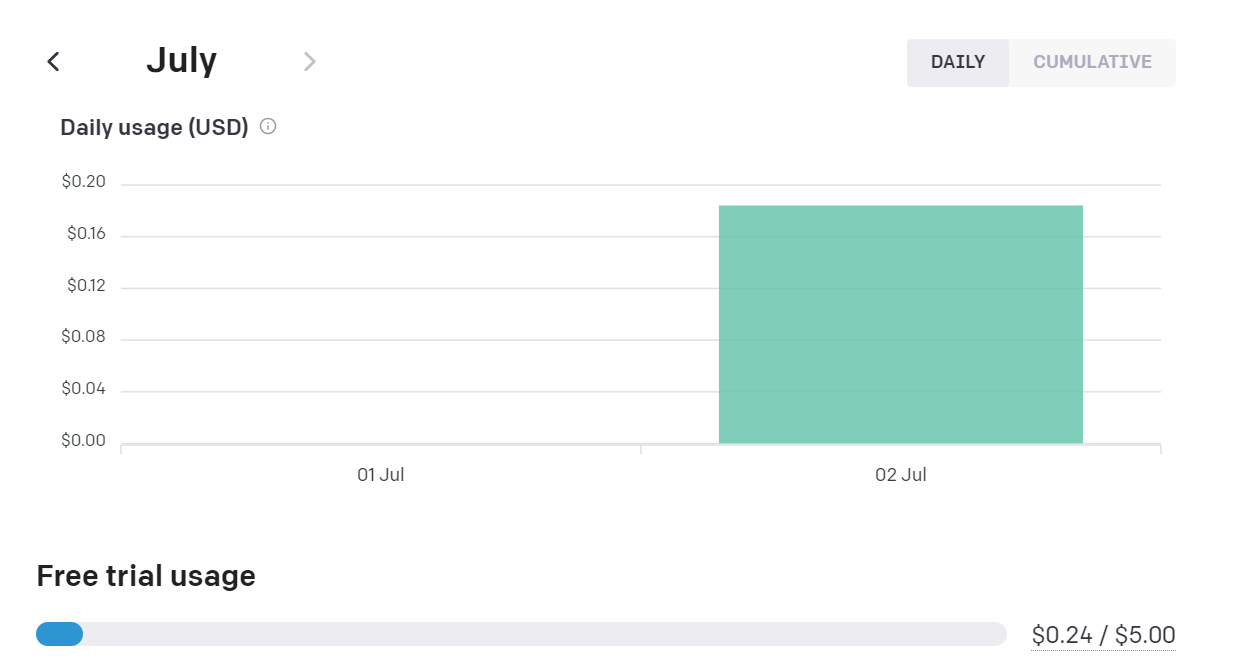

it was 0.05 when i satrted using API for this session, at the end it was 0.24.

So $0.20 used to generate 5 different version of answers for 5 Questions.